## Content
1. Extract data and build initial dataframes
2. Categorise data
3. Merge all temperature & humidity dataframes into one
4. Visualise trends & categories
5. Adopt package - 'pythermalcomfort', compute 'pmv & ppd' indexes & visualisations
6. Apply new 'clo' value on Rm. 02-412's time slots that originally gave 'Warm/Hot' sensations
7. Conclusions and further recommendations
8. References

## Targeted questions:

Q1. What are the trends of temperature and humidity of both rooms over time? What are the evaluations on the indoor air conditioning systems comparing to the outdoor environment?

Q2. What are the characteristics of temperature and humidity data of both room? 

Q3. According to ASHRAE guidelines for indoor environments, what are the distributions of the temperature and humidity data categories?

Q4. Is there any relationship between temperature and humidity data of Rm. 12-431?

Q5. What are the distributions of the pmv & ppd indexes categories? In comparison to the distributions of the temperature and humidity data categories, what insights could be drawn?

Q6. What are the trends of pmv & ppd indexes compared to those of temperature and humidity of both rooms?

Q7. Is there any relationship between temperature data and pmv indexes of Rm. 02-412?

Q8. Concerning 500 time slots of Room. 02-412 that originally gave 'Warm/Hot' sensations, would the sensations of occupants improve if they simply CHOSE TO TAKE OFF winter clothes, i.e changing the clo value into 0.61 clo (equivalant to 'Trousers and long sleeve shirt')? If yes, what would be the improved proportion of time slots?

## 1. Extract data and build initial dataframes

Firstly, build temperature and humidity dataframes for each rooms from extracted data sets, use appropriate data types, and round numerical data to 2 decimal places. 

(Data Source: https://eif-research.feit.uts.edu.au/)

(More about EIF Project: https://eif-wiki.feit.uts.edu.au/eif_overview)

In [1]:
# import necessary packages for data manipulations and visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings

In [2]:
# make dataframe for temperature data for Rm. 02-412
Temp_Cel_02_412 = pd.read_csv('ES_B_02_412_3E68_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_02_412['Date & Time'] = pd.to_datetime(Temp_Cel_02_412['Date & Time'])
Temp_Cel_02_412['Temperature (°C)'] = round(Temp_Cel_02_412['Temperature (°C)'].astype('float64'),2)

# make dataframe for humidity data for Rm. 02-412
Huma_02_412 = pd.read_csv('ES_B_02_412_3E68_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_02_412['Date & Time'] = pd.to_datetime(Huma_02_412['Date & Time'])
Huma_02_412['Humidity (%)'] = round(Huma_02_412['Humidity (%)'].astype('float64'),2)

# make dataframe for temperature data for Rm. 12-431
Temp_Cel_12_431 = pd.read_csv('ES_B_12_431_7BC2_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_12_431['Date & Time'] = pd.to_datetime(Temp_Cel_12_431['Date & Time'])
Temp_Cel_12_431['Temperature (°C)'] = round(Temp_Cel_12_431['Temperature (°C)'].astype('float64'),2)

# make dataframe for humidity data for Rm. 12-431
Huma_12_431 = pd.read_csv('ES_B_12_431_7BC2_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_12_431['Date & Time'] = pd.to_datetime(Huma_12_431['Date & Time'])
Huma_12_431['Humidity (%)'] = round(Huma_12_431['Humidity (%)'].astype('float64'),2)

# check dataframes
display(Temp_Cel_02_412.sample(5), Huma_02_412.tail(), Temp_Cel_12_431.head(), Huma_12_431.tail())

,Date & Time,Temperature (°C)
11875,2021-06-29 10:37:59,18.81
12566,2021-07-02 20:53:05,19.29
7466,2021-06-07 07:58:47,18.13
1245,2021-05-07 04:54:30,22.03
13437,2021-07-07 06:27:22,16.68


,Date & Time,Humidity (%)
18169,2021-07-30 23:26:57,35.10
18170,2021-07-30 23:34:01,34.74
18171,2021-07-30 23:41:05,33.73
18172,2021-07-30 23:48:09,33.00
18173,2021-07-30 23:55:13,32.71


,Date & Time,Temperature (°C)
0,2021-05-01 00:05:11,21.58
1,2021-05-01 00:12:14,21.16
2,2021-05-01 00:19:19,22.39
3,2021-05-01 00:26:22,22.16
4,2021-05-01 00:33:26,21.87


,Date & Time,Humidity (%)
18200,2021-07-30 23:25:03,29.47
18201,2021-07-30 23:32:07,29.34
18202,2021-07-30 23:39:11,28.77
18203,2021-07-30 23:46:15,28.44
18204,2021-07-30 23:53:18,27.78


In [3]:
# Check datatypes and shapes of dataframe columns
print(Temp_Cel_02_412.dtypes, '\n', Huma_02_412.shape, '\n', Temp_Cel_12_431.shape)

Date & Time         datetime64[ns]
Temperature (°C)           float64
dtype: object 
 (18174, 2) 
 (18205, 2)


In [4]:
# Merge temperature and humidity dataframes for each room on 'Date & Time' column
Temp_Cel_Huma_02_412 = pd.merge(Temp_Cel_02_412, Huma_02_412, on = 'Date & Time', how='inner')
Temp_Cel_Huma_12_431 = pd.merge(Temp_Cel_12_431, Huma_12_431, on = 'Date & Time', how='inner')

print(Temp_Cel_Huma_02_412.sample(5), '\n', Temp_Cel_Huma_12_431.sample(5))

              Date & Time  Temperature (°C)  Humidity (%)
3331  2021-05-17 14:11:26             20.65         33.61
3939  2021-05-20 15:42:31             22.52         36.99
17069 2021-07-25 11:21:43             18.45         25.04
2428  2021-05-13 02:15:29             20.29         61.48
5031  2021-05-26 03:11:10             22.58         49.39 
               Date & Time  Temperature (°C)  Humidity (%)
5239  2021-05-27 06:35:47             19.42         30.14
6774  2021-06-03 22:38:09             19.94         47.43
8895  2021-06-14 13:03:18             20.45         35.64
11821 2021-06-29 02:18:45             19.55         40.17
3670  2021-05-19 10:13:07             21.00         34.04


## 2. Categorise data

Categorise data into new columns according to 'satisfactory' ranges in ASHRAE guidelines for indoor environments in winter, 
- 68 °F to 74 °F (~ 20 °C - 23.5 °C) for temperature and, 
- 30% - 60% for relative humidity

https://www7.nau.edu/itep/main/eeop/docs/airqlty/AkIAQ_ThermalComfort.pdf

In [5]:
# set temperature and humidity categories limits: 
temp_acce_lower_lim=20.00
temp_acce_upper_lim=23.50
huma_acce_lower_lim=30.00
huma_acce_upper_lim=60.00

bins_Temp_Winter = [0, temp_acce_lower_lim, temp_acce_upper_lim, np.inf]
bins_Huma = [0, huma_acce_lower_lim, huma_acce_upper_lim, np.inf]
Temp_categories_indoor = ['Low Temp', 'Acceptable Temp','High Temp']
Huma_categories_indoor = ['Dry', 'Acceptable Huma','Wet']

# categorise data into new columns
Temp_Cel_Huma_02_412['Temp_cats'] = pd.cut(Temp_Cel_Huma_02_412['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_02_412['Huma_cats'] = pd.cut(Temp_Cel_Huma_02_412['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

Temp_Cel_Huma_12_431['Temp_cats'] = pd.cut(Temp_Cel_Huma_12_431['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_12_431['Huma_cats'] = pd.cut(Temp_Cel_Huma_12_431['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

# show each category counts and check data types
print(f"02_412_Temp_cats: \n{Temp_Cel_Huma_02_412['Temp_cats'].value_counts()}\n\n02_412_Huma_cats: \n{Temp_Cel_Huma_02_412['Huma_cats'].value_counts()}\n\n12_431_Temp_cats: \n{Temp_Cel_Huma_12_431['Temp_cats'].value_counts()}\n\n12_431_Huma_cats: \n{Temp_Cel_Huma_12_431['Huma_cats'].value_counts()}\n\nData types: \n{Temp_Cel_Huma_02_412.dtypes}")

02_412_Temp_cats: 
Temp_cats
Low Temp           8430
Acceptable Temp    8317
High Temp          1427
Name: count, dtype: int64

02_412_Huma_cats: 
Huma_cats
Acceptable Huma    16420
Dry                  877
Wet                  877
Name: count, dtype: int64

12_431_Temp_cats: 
Temp_cats
Acceptable Temp    12527
Low Temp            5676
High Temp              2
Name: count, dtype: int64

12_431_Huma_cats: 
Huma_cats
Acceptable Huma    13653
Dry                 4490
Wet                   62
Name: count, dtype: int64

Data types: 
Date & Time         datetime64[ns]
Temperature (°C)           float64
Humidity (%)               float64
Temp_cats                 category
Huma_cats                 category
dtype: object


In [6]:
# check shapes of dataframes of each room again
print(Temp_Cel_Huma_02_412.shape, '\n', Temp_Cel_Huma_12_431.shape)

(18174, 5) 
 (18205, 5)


## 3. Merge all temperature and humidity dataframes into one

### 3.1 Compare 'time differences' in dataframes before merging

As shown, both dataframes are of different numbers of row of records within same period (possibly due to different maintainance time/calibration differences of each sensor), therefore, none of them can be cursorily choosen as the 'left table' in merge function.

To create a more evenly merged dataframe of both, the 'time differences' values among all records are to be computed as new columns, the dataframe with a SMALLER standard deviation in 'time differences' column would be a more even one (all data distributed closer to mean).

In [7]:
# compute time differences values for both dataframes
Temp_Cel_Huma_02_412['Time_Diff'] = Temp_Cel_Huma_02_412['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))
Temp_Cel_Huma_12_431['Time_Diff'] = Temp_Cel_Huma_12_431['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))

display(Temp_Cel_Huma_02_412.tail(), Temp_Cel_Huma_12_431.head())

,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
18169,2021-07-30 23:26:57,19.68,35.10,Low Temp,Acceptable Huma,0 days 00:07:04
18170,2021-07-30 23:34:01,22.52,34.74,Acceptable Temp,Acceptable Huma,0 days 00:07:04
18171,2021-07-30 23:41:05,18.39,33.73,Low Temp,Acceptable Huma,0 days 00:07:04
18172,2021-07-30 23:48:09,21.06,33.00,Acceptable Temp,Acceptable Huma,0 days 00:07:04
18173,2021-07-30 23:55:13,18.10,32.71,Low Temp,Acceptable Huma,0 days 00:07:04


,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
0,2021-05-01 00:05:11,21.58,54.02,Acceptable Temp,Acceptable Huma,0 days 00:00:00
1,2021-05-01 00:12:14,21.16,54.18,Acceptable Temp,Acceptable Huma,0 days 00:07:03
2,2021-05-01 00:19:19,22.39,54.23,Acceptable Temp,Acceptable Huma,0 days 00:07:05
3,2021-05-01 00:26:22,22.16,54.27,Acceptable Temp,Acceptable Huma,0 days 00:07:03
4,2021-05-01 00:33:26,21.87,54.25,Acceptable Temp,Acceptable Huma,0 days 00:07:04


In [8]:
# check Descriptive Statistics of both 'Time_Diff' columns
print(Temp_Cel_Huma_02_412['Time_Diff'].describe(), '\n\n', Temp_Cel_Huma_12_431['Time_Diff'].describe())

count                        18174
mean     0 days 00:07:12.598987564
std      0 days 00:01:00.928074890
min                0 days 00:00:00
25%                0 days 00:07:04
50%                0 days 00:07:04
75%                0 days 00:07:04
max                0 days 00:21:17
Name: Time_Diff, dtype: object 

 count                        18205
mean     0 days 00:07:11.842186212
std      0 days 00:00:57.698448356
min                0 days 00:00:00
25%                0 days 00:07:04
50%                0 days 00:07:04
75%                0 days 00:07:04
max                0 days 00:21:19
Name: Time_Diff, dtype: object


### 3.2 Deciding 'left table' for 'merge_asof' function

Standard Deviation (std) of Rm. 12-431 is SMALLER (~ 57.70 seconds).

Therefore, dataframe of Rm. 12-431 is chosen as the 'left table' in 'merge_asof' function.

In [9]:
# drop 'Time_Diff' columns as they will be useless for future calculations
Temp_Cel_Huma_02_412 = Temp_Cel_Huma_02_412.drop('Time_Diff', axis = 1)
Temp_Cel_Huma_12_431 = Temp_Cel_Huma_12_431.drop('Time_Diff', axis = 1)

In [10]:
# apply merge_asof on both dataframes, using Rm. 12-431 as the 'left table', then re-order columns
all_Temp_Huma = pd.merge_asof(Temp_Cel_Huma_12_431, Temp_Cel_Huma_02_412, on = ['Date & Time'], direction = 'nearest', suffixes=['_12_431', '_02_412'])

# re-order columns
re_ordered_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 
                   'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431']

all_Temp_Huma = all_Temp_Huma[re_ordered_cols]

print(all_Temp_Huma.shape)
all_Temp_Huma.sample(5)

(18205, 9)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431
8353,2021-06-11 20:21:21,19.13,39.96,Low Temp,Acceptable Huma,20.77,34.08,Acceptable Temp,Acceptable Huma
10978,2021-06-24 21:54:59,21.29,49.62,Acceptable Temp,Acceptable Huma,20.65,44.47,Acceptable Temp,Acceptable Huma
14636,2021-07-13 05:32:36,17.90,47.76,Low Temp,Acceptable Huma,18.84,40.03,Low Temp,Acceptable Huma
4514,2021-05-23 16:07:22,21.68,54.70,Acceptable Temp,Acceptable Huma,21.52,48.72,Acceptable Temp,Acceptable Huma
17077,2021-07-25 08:57:35,19.19,29.47,Low Temp,Dry,19.23,24.21,Low Temp,Dry


## 4. Visualise trends and categories 

Plot

- trends of temperature and humidity data and,
- 'satisfactory' limits of temperature and humidity suggested by ASHRAE guidelines

along the same 'Date & Time' values in separate graphs.

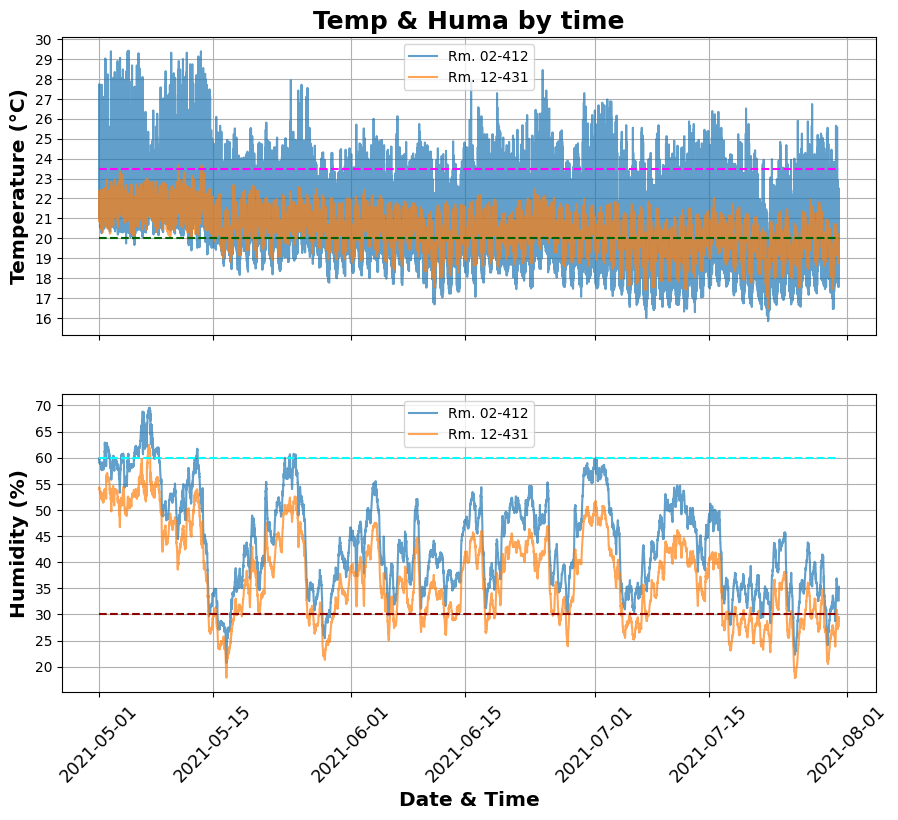

In [13]:
# visualisation of 'Date & time' vs temperature and humidity data sets of both rooms
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.set_size_inches(10.5, 8.5)
colour = 'white' ## !!! swap 2 colours when using dark theme
colour_2 = 'black'

# edit appearances for both graphs
ax1.set_title('Temp & Huma by time', color=colour_2, fontsize=18, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('Temperature (°C)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)
ax1.locator_params('y', nbins=15)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.set_ylabel('Humidity (%)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)
ax2.locator_params('y', nbins=15)
plt.xticks(rotation = 45, fontsize=12.5)


# plot data sets
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='medium', loc=9)
ax1.hlines(y=temp_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkgreen', linestyles='dashed')
ax1.hlines(y=temp_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='magenta', linestyles='dashed')
# ax1.text('2021-08-01', temp_acce_lower_lim,'20 °C', fontsize='small')
# ax1.text('2021-08-01', temp_acce_upper_lim,'23.5 °C', fontsize='small')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='medium', loc=9)
ax2.hlines(y=huma_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkred', linestyles='dashed')
ax2.hlines(y=huma_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='cyan', linestyles='dashed')
# ax2.text('2021-08-01', huma_acce_lower_lim,'30 %', fontsize='small')
# ax2.text('2021-08-01', huma_acce_upper_lim,'60 %', fontsize='small')

plt.show()

### Due to high density and volatility, the temperature graph might not seem like a usual line plot, as its has , lets zoom in and make a quick sample plot for the first 150 temperature data, we can see that it is actually an ordinary line plot

<Axes: xlabel='Date & Time'>

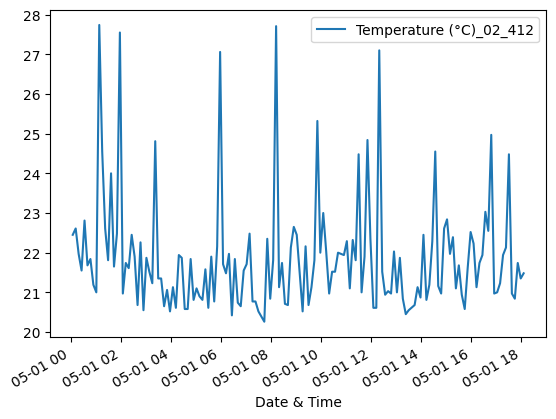

In [12]:
all_Temp_Huma.iloc[0:150].plot('Date & Time', 'Temperature (°C)_02_412')

### Q1. What are the trends of temperature and humidity of both rooms over time? What are the evaluations on the indoor air conditioning systems comparing to the outdoor environment?

- Temperatures of room 12.431 had lower volatility than those in room 02.412,
however both data sets had a significant amount dropped lower than 20 °C.


- Humidity data of both rooms followed similar trend with ~8% differences, with a seemingly big portion fallen into 30%-60% range (acceptable humidity).

which indicated that the air-conditioning system did not adequately adjust the indoor thermal situations in both rooms to 'satisfactory' levels, as the outdoor temperature were significantly lower than the indoor temperature in Rm. 02-412 in 1st half of May 2021, contrarily around 15 May 2021 onwards, the temperature in both rooms dropped below 20 °C gradually til the end of July 2021, which might made both rooms unideal shelters/working environments for occupants preferred doing indoor data/analysis work .

Source of historical weather data: (Time and Date, 2024)

https://www.timeanddate.com/weather/australia/sydney/historic?month=5&year=2021

https://www.timeanddate.com/weather/australia/sydney/historic?month=7&year=2021

       Temperature (°C)_02_412  Temperature (°C)_12_431
count             18205.000000             18205.000000
mean                 20.429939                20.441938
std                   2.056292                 0.949141
min                  15.840000                16.480000
25%                  18.900000                19.840000
50%                  20.290000                20.480000
75%                  21.710000                21.100000
max                  29.420000                23.650000
       Humidity (%)_02_412  Humidity (%)_12_431
count         18205.000000         18205.000000
mean             43.878452            37.377987
std               9.445582             8.776173
min              20.720000            17.810000
25%              36.000000            30.070000
50%              43.170000            36.390000
75%              50.760000            43.620000
max              69.580000            62.420000


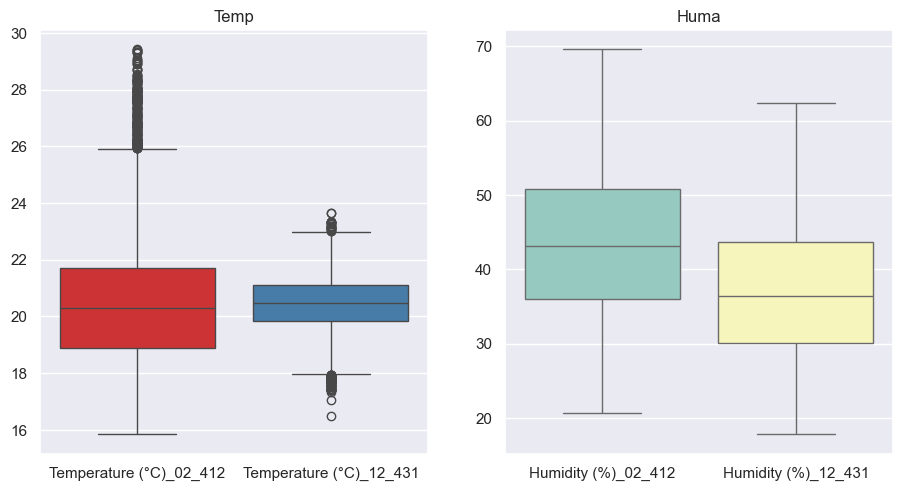

In [14]:
# visualise descriptive statistics of temperature and humidity data with boxplot
sns.set(rc={'figure.figsize':(11,5.5)})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1 = sns.boxplot(data=all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']], palette='Set1', ax=ax1)
ax2 = sns.boxplot(data=all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']], palette='Set3', ax=ax2)

ax1.set_title('Temp')
ax2.set_title('Huma')

print(all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']].describe())
print(all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']].describe())

plt.show()

### Q2. What are the characteristics of temperature and humidity data of both room? 

As shown in Descriptive Statistics and boxplots,

- The high volatility and standard deviation of temperature data in Rm. 02-412 lead to more upper outliers which were ~ 5.5 °C - 9 °C higher than the mean temperature, under poorly air-conditioned environment.


- Relative humidity of both rooms followed similar trends with constant differences (also shown in previous visualisation) and a standard deviation(std) difference of only ~ 7.6 % from another's.

Temp_cats_02_412
Low Temp           0.464158
Acceptable Temp    0.456743
High Temp          0.079099
Name: proportion, dtype: float64 

 Temp_cats_12_431
Acceptable Temp    0.688108
Low Temp           0.311782
High Temp          0.000110
Name: proportion, dtype: float64 

 Huma_cats_02_412
Acceptable Huma    0.904532
Dry                0.047734
Wet                0.047734
Name: proportion, dtype: float64 

 Huma_cats_12_431
Acceptable Huma    0.749959
Dry                0.246636
Wet                0.003406
Name: proportion, dtype: float64


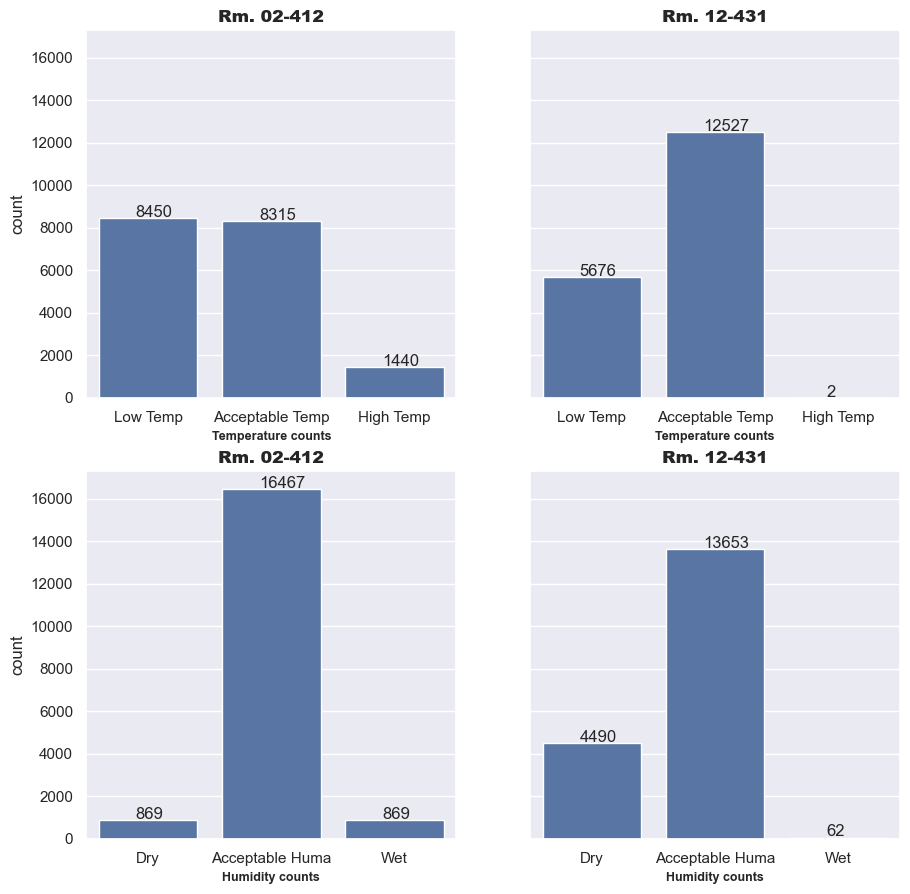

In [20]:
# show all categorical counts of temperature and humidity distributions
sns.set(rc={'figure.figsize':(10.5,10.5)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

# plot categories
ax1 = sns.countplot(x='Temp_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='Temp_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='Huma_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='Huma_cats_12_431', data=all_Temp_Huma, ax=ax4)

# edit appearances of graphs
ax1.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')

ax1.set_xlabel('Temperature counts', fontsize=9, fontweight ='bold')
ax2.set_xlabel('Temperature counts', fontsize=9, fontweight ='bold')
ax3.set_xlabel('Humidity counts', fontsize=9, fontweight ='bold')
ax4.set_xlabel('Humidity counts', fontsize=9, fontweight ='bold')

# annotating bars
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

print(all_Temp_Huma['Temp_cats_02_412'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Temp_cats_12_431'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Huma_cats_02_412'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Huma_cats_12_431'].value_counts(normalize=True))

plt.show()

### Q3. According to ASHRAE guidelines for indoor environments, what are the distributions of the temperature and humidity data categories?
As shown in the categorical countplots, with significant counts of 'Low Temp' categories, there were also 1440 'High Temp' (~ 8%) and 869 'Wet' (4.77%) records for Rm. 02-412 (correspond to 1st half of May 2021 in previous plot for trends), while there were negligible amount of same kind of records for Rm. 12-431.

r^2 = 0.145


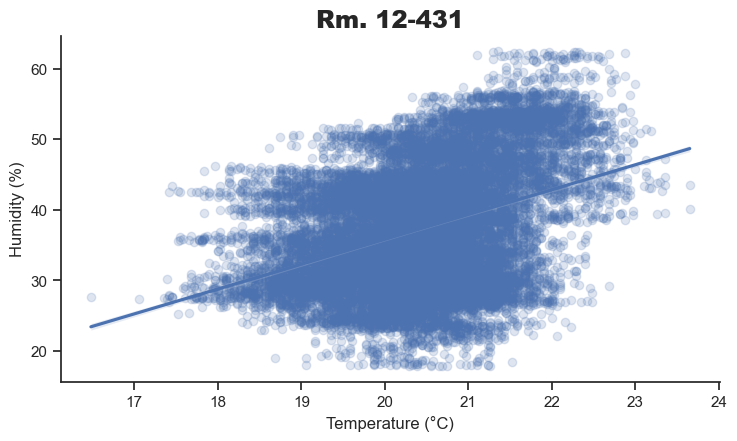

In [21]:
# create a scatterplot with regression line for humidity vs temperature for Rm.12.431
from sklearn.linear_model import LinearRegression 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 4.5)

x=Temp_Cel_Huma_12_431['Temperature (°C)']
y=Temp_Cel_Huma_12_431['Humidity (%)']

# plot data
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
ax.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')

# compute r^2 value
lin_reg = LinearRegression().fit(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])
r2 = lin_reg.score(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### Q4. Is there any relationship between temperature and humidity data of Rm. 12-431?

r^2 value below 0.4 indicates a weak correlation between temperature and humidity. (Jason Fernando, 2024)

(r^2 >= 0.7 is considered strong correlations)

## 5. Adopt package - 'pythermalcomfort', compute pmv & ppd indexes and visualisations

Compute pmv & ppd index values using the third-party python package - pythermalcomfort, and create new columns in existing dataframe, 'all_Temp_Huma'.

To achieve 'comfortable' sensations in indoor environment, the time slot must satisfy following conditions, (Sebastian Guenther, 2024)

 - -0.5 <= pmv <=0.5
 - ppd <= 10%

### Please refer to README.md for further readings about thermal comfort theories and documentations of 'pythermal comfort'. (Federico Tartarini, 2024)(Tartarini, F., Schiavon, S., 2020)

In [40]:
'''
!!!do not run this cell again.
'''
# # import sys to install pythermalcomfort
# import sys
# !{sys.executable} -m pip install pythermalcomfort

  Using cached pythermalcomfort-1.10.0-py2.py3-none-any.whl (42 kB)
  Using cached jos3-0.2.6-py3-none-any.whl (27 kB)


In [22]:
# import package pythermalcomfort and check its contents
import pythermalcomfort
help(pythermalcomfort)

Help on package pythermalcomfort:

NAME
    pythermalcomfort

PACKAGE CONTENTS
    __main__
    cli
    jos3_functions (package)
    models (package)
    psychrometrics
    shared_functions
    utilities

SUBMODULES
    __init__
    atcs
    jos3
    zhang_comfort

VERSION
    __version__ = '2.10.0'

FILE
    c:\users\acer\appdata\local\programs\python\python312\lib\site-packages\pythermalcomfort\__init__.py




In [23]:
# test package 'pythermalcomfort' with first row of dataset - temp = 22.45 °C and huma = 59.56 % (2021-05-01 00:05:11)
from pythermalcomfort.models import pmv_ppd

warnings.filterwarnings('ignore') # run this cell twice to ingore warning

# define variables (operativetemperature，relative humidity，air speed metabolic rate，clothing level) based on assumptions 
date = all_Temp_Huma['Date & Time'].iloc[0]
test_op_temp = all_Temp_Huma['Temperature (°C)_02_412'].iloc[0]
air_spd_r = 0.1 # simulating simple heat transfer calculations
test_rh = all_Temp_Huma['Humidity (%)_02_412'].iloc[0]
met = 1.1 # typing, typical work situation for occupants in both rooms
clo = 1 # typical winter indoor clothing
wme = 0
standard = 'ASHRAE'

# assuming Mean Radiant temperature = Air Temperature, therefore tdb = tr
test_results = pmv_ppd(tdb=test_op_temp, tr=test_op_temp, vr=air_spd_r, rh=test_rh, met=met, clo=clo, wme=wme, standard=standard)

# print(test_results['pmv'])
print(f"Date & Time: {date}, pmv: {test_results['pmv']}, ppd: {test_results['ppd']}.")

Date & Time: 2021-05-01 00:05:11, pmv: 0.07, ppd: 5.1.


In [24]:
# calculate all pmv & ppd indexes and create new columns
all_Temp_Huma['pmv & ppd_02_412'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], x['Temperature (°C)_02_412'], air_spd_r, 
                                                        x['Humidity (%)_02_412'], met, clo, wme, standard), axis=1)

all_Temp_Huma['pmv & ppd_12_431'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_12_431'], x['Temperature (°C)_12_431'], air_spd_r, 
                                                        x['Humidity (%)_12_431'], met, clo, wme, standard), axis=1)

warnings.filterwarnings(action='ignore')

all_Temp_Huma

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv & ppd_02_412,pmv & ppd_12_431
0,2021-05-01 00:05:11,22.45,59.56,Acceptable Temp,Acceptable Huma,21.58,54.02,Acceptable Temp,Acceptable Huma,"{'pmv': 0.07, 'ppd': 5.1}","{'pmv': -0.18, 'ppd': 5.6}"
1,2021-05-01 00:12:14,22.61,59.52,Acceptable Temp,Acceptable Huma,21.16,54.18,Acceptable Temp,Acceptable Huma,"{'pmv': 0.11, 'ppd': 5.3}","{'pmv': -0.28, 'ppd': 6.6}"
2,2021-05-01 00:19:19,21.97,59.66,Acceptable Temp,Acceptable Huma,22.39,54.23,Acceptable Temp,Acceptable Huma,"{'pmv': -0.05, 'ppd': 5.0}","{'pmv': 0.02, 'ppd': 5.0}"
3,2021-05-01 00:26:22,21.55,59.94,Acceptable Temp,Acceptable Huma,22.16,54.27,Acceptable Temp,Acceptable Huma,"{'pmv': -0.15, 'ppd': 5.4}","{'pmv': -0.03, 'ppd': 5.0}"
4,2021-05-01 00:33:26,22.81,59.78,Acceptable Temp,Acceptable Huma,21.87,54.25,Acceptable Temp,Acceptable Huma,"{'pmv': 0.16, 'ppd': 5.5}","{'pmv': -0.11, 'ppd': 5.2}"
...,...,...,...,...,...,...,...,...,...,...,...
18200,2021-07-30 23:25:03,19.68,35.10,Low Temp,Acceptable Huma,19.00,29.47,Low Temp,Dry,"{'pmv': -0.74, 'ppd': 16.4}","{'pmv': -0.92, 'ppd': 23.0}"
18201,2021-07-30 23:32:07,22.52,34.74,Acceptable Temp,Acceptable Huma,19.32,29.34,Low Temp,Dry,"{'pmv': -0.08, 'ppd': 5.1}","{'pmv': -0.85, 'ppd': 20.3}"
18202,2021-07-30 23:39:11,18.39,33.73,Low Temp,Acceptable Huma,19.26,28.77,Low Temp,Dry,"{'pmv': -1.04, 'ppd': 27.9}","{'pmv': -0.87, 'ppd': 20.9}"
18203,2021-07-30 23:46:15,21.06,33.00,Acceptable Temp,Acceptable Huma,19.45,28.44,Low Temp,Dry,"{'pmv': -0.43, 'ppd': 8.8}","{'pmv': -0.83, 'ppd': 19.4}"


In [25]:
# split old 'pmv & ppd' columns into individual 'pmv' and 'ppd' columns and drop them, and re-order all columns according to room no.
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_02_412'], axis=1), all_Temp_Huma['pmv & ppd_02_412'].apply(pd.Series)], axis=1)
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_12_431'], axis=1), all_Temp_Huma['pmv & ppd_12_431'].apply(pd.Series)], axis=1)

new_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'Temperature (°C)_12_431', 
            'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_02_412', 'ppd_02_412', 'pmv_12_431', 'ppd_12_431']

# rename columns
all_Temp_Huma.columns = new_cols

# re-order columns
new_cols_ordered = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 
                    'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431']

all_Temp_Huma = all_Temp_Huma[new_cols_ordered]

In [26]:
# check shape and appearance of dataframe with pmv and ppd columns separated
print(all_Temp_Huma.shape)
all_Temp_Huma.sample(5)

(18205, 13)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv_12_431,ppd_12_431
15967,2021-07-19 20:15:51,23.68,33.33,High Temp,Acceptable Huma,0.19,5.8,20.23,27.02,Acceptable Temp,Dry,-0.66,14.0
487,2021-05-03 11:13:22,21.00,56.38,Acceptable Temp,Acceptable Huma,-0.30,6.9,22.29,49.69,Acceptable Temp,Acceptable Huma,-0.03,5.0
3747,2021-05-19 19:24:22,21.13,48.23,Acceptable Temp,Acceptable Huma,-0.32,7.1,20.65,41.48,Acceptable Temp,Acceptable Huma,-0.47,9.7
7511,2021-06-07 15:07:57,20.77,45.46,Acceptable Temp,Acceptable Huma,-0.42,8.7,21.10,38.15,Acceptable Temp,Acceptable Huma,-0.39,8.1
13378,2021-07-06 21:26:01,18.42,42.61,Low Temp,Acceptable Huma,-0.99,25.7,21.00,34.15,Acceptable Temp,Acceptable Huma,-0.44,9.0


In [27]:
# similarly, categorise pmv & ppd indexes, check columns datatypes and proportional value counts of each categories
pmv_low=-0.5
pmv_neu=0.5
ppd_sat=10

all_Temp_Huma['pmv_cats_02_412'] = np.where(all_Temp_Huma['pmv_02_412']<pmv_low,'Cool/Cold', np.where(all_Temp_Huma['pmv_02_412']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_02_412'] = pd.Series(all_Temp_Huma['pmv_cats_02_412'], dtype='category')

all_Temp_Huma['ppd_cats_02_412'] = np.where(all_Temp_Huma['ppd_02_412']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_02_412'] = pd.Series(all_Temp_Huma['ppd_cats_02_412'], dtype='category')

all_Temp_Huma['pmv_cats_12_431'] = np.where(all_Temp_Huma['pmv_12_431']<pmv_low,'Cool/Cold', np.where(all_Temp_Huma['pmv_12_431']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_12_431'] = pd.Series(all_Temp_Huma['pmv_cats_12_431'], dtype='category')

all_Temp_Huma['ppd_cats_12_431'] = np.where(all_Temp_Huma['ppd_12_431']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_12_431'] = pd.Series(all_Temp_Huma['ppd_cats_12_431'], dtype='category')

# re-order columns
new_cols_ordered_2 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 
                      'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 'Temperature (°C)_12_431', 'Humidity (%)_12_431', 
                      'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431', 'pmv_cats_12_431', 'ppd_cats_12_431']

all_Temp_Huma = all_Temp_Huma.reindex(new_cols_ordered_2, axis=1)

print(all_Temp_Huma.dtypes, '\n\n', 
      round(all_Temp_Huma['pmv_cats_02_412'].value_counts(normalize = True), 3), '\n\n', 
      round(all_Temp_Huma['ppd_cats_02_412'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['pmv_cats_12_431'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['ppd_cats_12_431'].value_counts(normalize = True), 3))

Date & Time                datetime64[ns]
Temperature (°C)_02_412           float64
Humidity (%)_02_412               float64
Temp_cats_02_412                 category
Huma_cats_02_412                 category
pmv_02_412                        float64
ppd_02_412                        float64
pmv_cats_02_412                  category
ppd_cats_02_412                  category
Temperature (°C)_12_431           float64
Humidity (%)_12_431               float64
Temp_cats_12_431                 category
Huma_cats_12_431                 category
pmv_12_431                        float64
ppd_12_431                        float64
pmv_cats_12_431                  category
ppd_cats_12_431                  category
dtype: object 

 pmv_cats_02_412
Cool/Cold    0.530
Neutral      0.436
Warm/Hot     0.034
Name: proportion, dtype: float64 

 ppd_cats_02_412
Dissatisfied    0.575
Satisfied       0.425
Name: proportion, dtype: float64 

 pmv_cats_12_431
Cool/Cold    0.572
Neutral      0.428
Name: prop

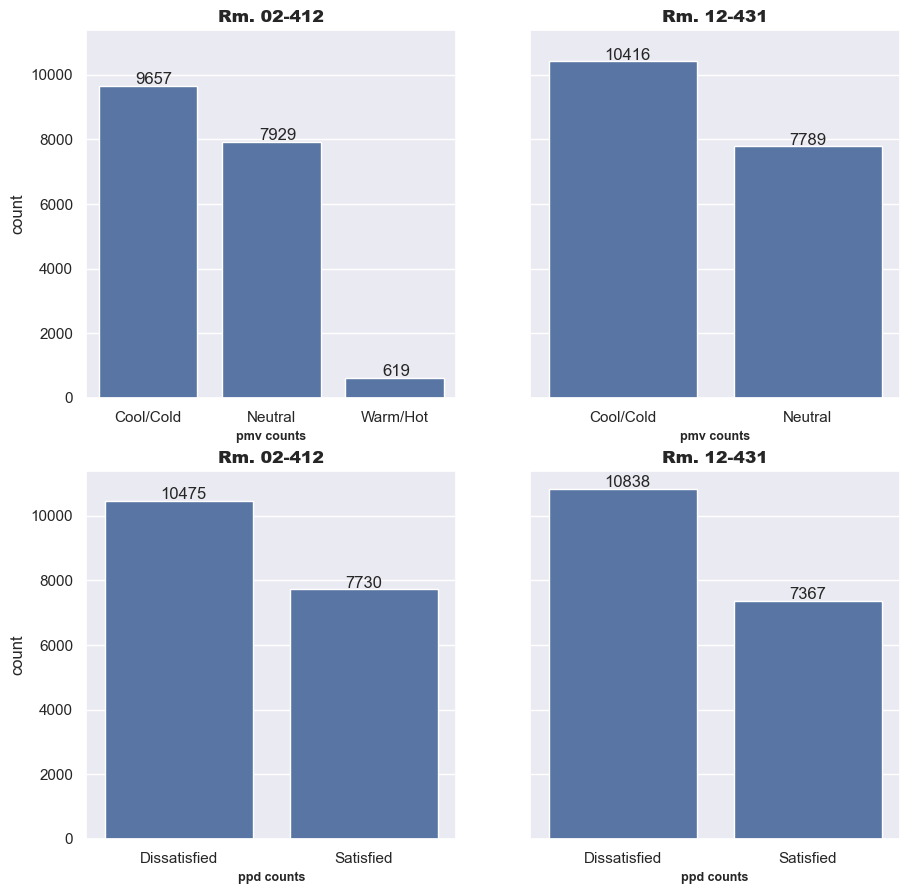

In [28]:
# similarly create a countplot for pmv & ppd indexes categories
sns.set(rc={'figure.figsize':(10.5,10.5)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

# plot categories
ax1 = sns.countplot(x='pmv_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='pmv_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='ppd_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='ppd_cats_12_431', data=all_Temp_Huma, ax=ax4)

# edit appearances
ax1.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')

ax1.set_xlabel('pmv counts', fontsize=9, fontweight ='bold')
ax2.set_xlabel('pmv counts', fontsize=9, fontweight ='bold')
ax3.set_xlabel('ppd counts', fontsize=9, fontweight ='bold')
ax4.set_xlabel('ppd counts', fontsize=9, fontweight ='bold')

# annotating bars
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.show()

### Q5. What are the distributions of the pmv & ppd indexes categories? In comparison to the distributions of the temperature and humidity data categories, what insights could be drawn?

There are more 'cool/cold' time slots in both rooms, and it's more likely that less than 80% occupants are to feel 'satisfied' in more than a half of time slots (ppd>10%), even 'Acceptable temp' and 'Acceptable huma' were in majority in Rm. 12-431 were shown in previous countplot. 

Therefore, neither temperature nor humidity could be adopted as a single factor in thermal comfort analysis.

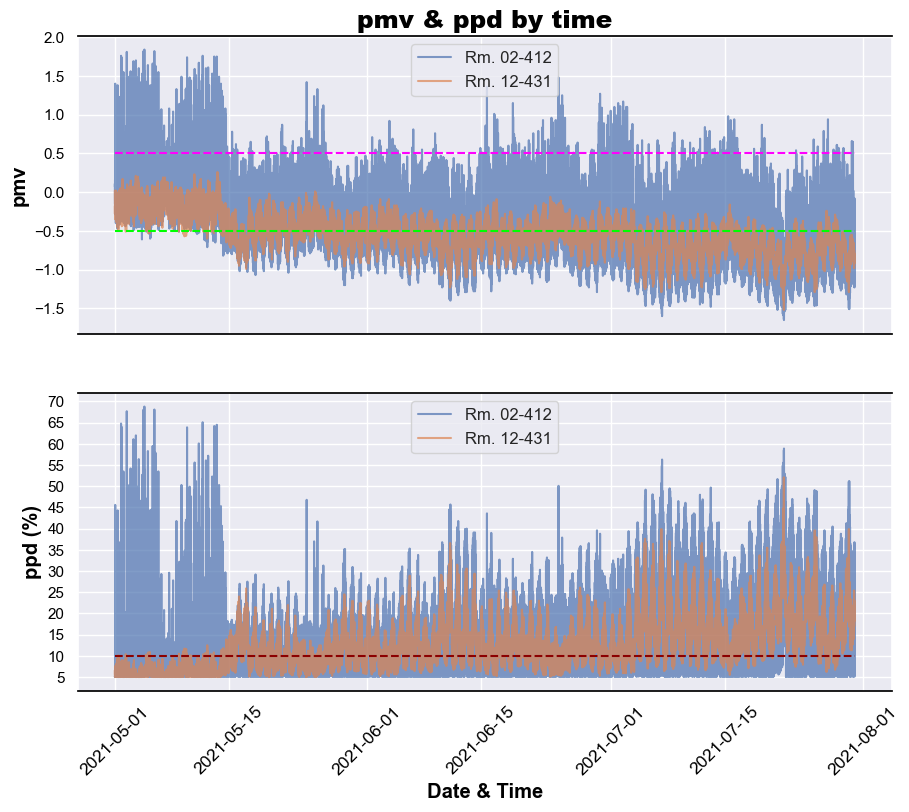

In [30]:
# Visualisations of pmv & ppd indexes of both rooms vs 'Date & time', as well as their lower and upper limits
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.set_size_inches(10.5, 8.5)

# edit appearances
ax1.set_title('pmv & ppd by time', color=colour_2, fontsize=18, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('pmv', fontweight ='bold', color = colour_2, fontsize=14.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)
ax1.locator_params('y', nbins=15)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.set_ylabel('ppd (%)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)
ax2.locator_params('y', nbins=15)

plt.xticks(rotation = 45, fontsize=12.5)

# plot data
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='medium', loc=9)
ax1.hlines(y=pmv_low, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='lime', linestyles='dashed')
ax1.hlines(y=pmv_neu, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='magenta', linestyles='dashed')
# ax1.text('2021-08-01', pmv_low,'- 0.5', fontsize='small')
# ax1.text('2021-08-01', pmv_neu,'  0.5', fontsize='small')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='medium', loc=9)
ax2.hlines(y=ppd_sat, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkred', linestyles='dashed')

# ax2.text('2021-08-01', ppd_sat,'10 %', fontsize='small')

plt.show()

### Q6. What are the trends of pmv & ppd indexes compared to those of temperature and humidity of both rooms?

- Occupants are more likely to receive 'Warm/Hot' sensations in first half of May 2021 (autumn, pmv>0.5 and ppd>10%)


- From around mid May 2021, pmv values began to drop gradually below -0.5 til late July (Winter), ppd gradually rose during the same period too, indicating more dissatisfying indoor thermal sensations

# Did you notice that the 'Temperature vs Date & Time' graph looks almost THE SAME as the 'pmv vs Date & Time' graph!?

Although the numbers of data sets respectively fallen in the ranges of acceptable temperature and neutral pmv are not the same, temperature had higher influences than other factors on pmv indexes compution in this case.


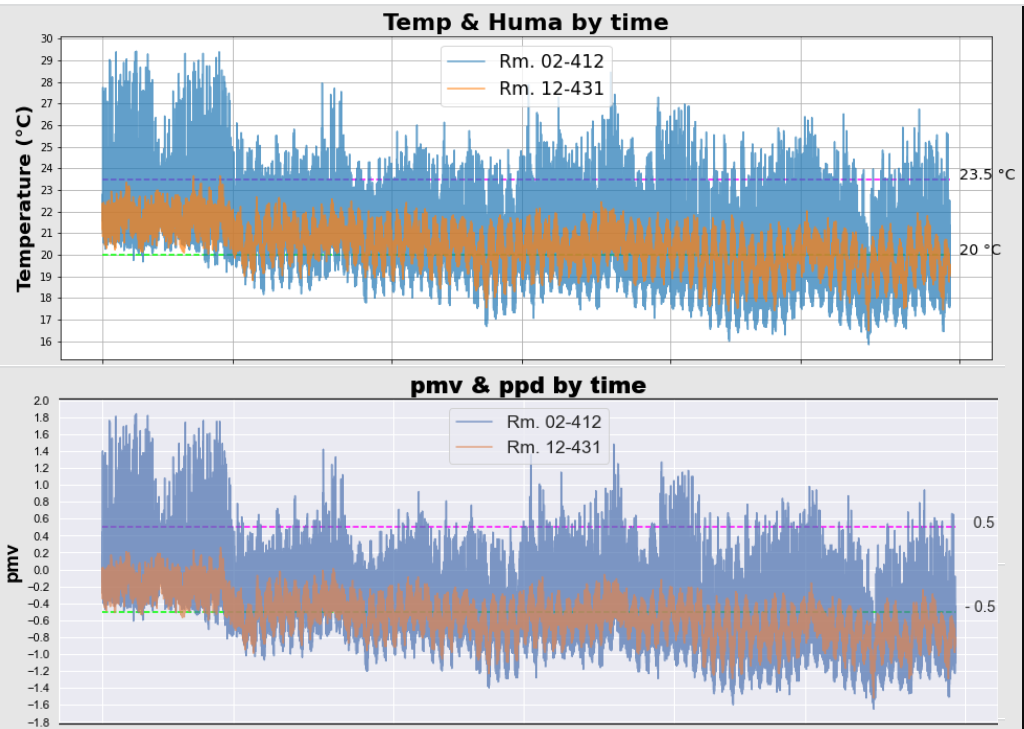

r^2 = 0.988


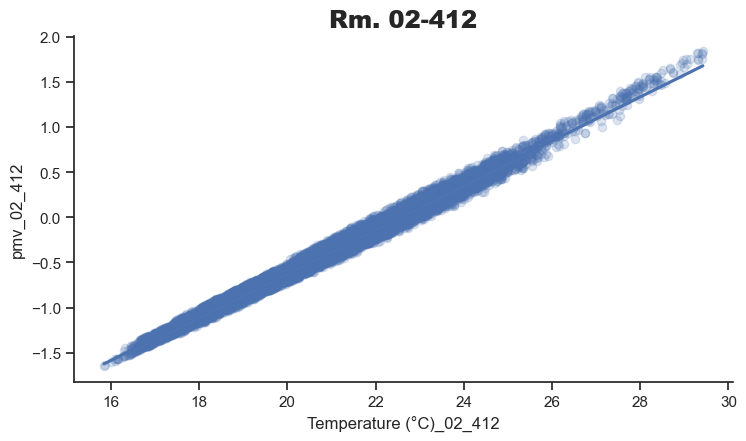

In [31]:
# create a scatterplot with regression line for pmv vs temperature for Rm.02-412
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 4.5)

x=all_Temp_Huma['Temperature (°C)_02_412']
y=all_Temp_Huma['pmv_02_412']

# plot data
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
ax.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')

# compute r^2 value
lin_reg = LinearRegression().fit(all_Temp_Huma[['Temperature (°C)_02_412']], all_Temp_Huma['pmv_02_412'])
r2 = lin_reg.score(all_Temp_Huma[['Temperature (°C)_02_412']], all_Temp_Huma['pmv_02_412'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### Q7. Is there any relationship between temperature data and pmv indexes of Rm. 02-412?

Both pmv vs temperature regplot and r^2 >= 0.7 indicate strong correlations between 2 data sets.

## 6. Apply new 'clo' value on Rm. 02-412's time slots that originally gave 'Warm/Hot' sensations

Sort out the time slots with 'Warm/Hot' pmv category which have the lowest 500 pmv values, i.e. the closest values to the 'neutral' pmv range.

Assuming most of the occupants simply CHOSE TO TAKE OFF winter clothes when they feel 'Warm/Hot', re-compute pmv and ppd indexes with a new clo value, 0.61 clo, equivalant to 'Trousers and long sleeve shirt'.(Tartarini, F., Schiavon, S., 2020)(Unknown authur, unknown year) Then re-examine  proportions of time slots which would no longer give 'Warm/Hot' and 'Dissatisfied' sensations to occupants.

In [32]:
# Sort out time slots with hot sensation (pmv>0.5)
high_pmv_02_412 = all_Temp_Huma.loc[all_Temp_Huma['pmv_02_412']>pmv_neu]

num_sort=500

cols_02_412 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
               'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412']

# Sort out times slots with lowest 500 pmv values within, and reset dataframe index
high_ppd_02_412_500th = high_pmv_02_412[cols_02_412].nsmallest(num_sort,'pmv_02_412').sort_values(by='Date & Time')
high_ppd_02_412_500th.reset_index(drop=True, inplace=True)

print(high_ppd_02_412_500th.shape)
high_ppd_02_412_500th.head()

(500, 9)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied


In [33]:
# double confirm that they are time slots with hot sensations, True when the results are emply
display(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']!='Warm/Hot'])
display(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']!='Dissatisfied'])
print(high_ppd_02_412_500th[['pmv_02_412', 'ppd_02_412']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


       pmv_02_412  ppd_02_412
count  500.000000  500.000000
mean     0.709400   16.249200
std      0.176859    5.994304
min      0.510000   10.400000
25%      0.570000   11.875000
50%      0.650000   13.800000
75%      0.810000   18.850000
max      1.160000   33.400000


In [34]:
# apply new clo value, to see if occupants can gain acceptable pmv and ppd indexes by taking off winter clothes
clo_new = 0.61 # 'Trousers and long sleeve shirt'

high_ppd_02_412_500th['pmv & ppd_02_412_new'] = high_ppd_02_412_500th.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], 
                                                                                              x['Temperature (°C)_02_412'], 
                                                                                              air_spd_r, x['Humidity (%)_02_412'], 
                                                                                              met, clo_new, wme, standard), axis=1)

high_ppd_02_412_500th = pd.concat([high_ppd_02_412_500th.drop(['pmv & ppd_02_412_new'], axis=1), 
                                   high_ppd_02_412_500th['pmv & ppd_02_412_new'].apply(pd.Series)], axis=1)

new_cols_hot_02_412_new_clo = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 
                               'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 'pmv_02_412_new_clo', 'ppd_02_412_new_clo']

high_ppd_02_412_500th.columns = new_cols_hot_02_412_new_clo

In [35]:
# check shape and appearance of dataframe with new pmv and ppd columns
print(high_ppd_02_412_500th.shape)
high_ppd_02_412_500th.sample(5)

(500, 11)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
477,2021-07-19 14:01:16,26.26,33.32,High Temp,Acceptable Huma,0.81,18.8,Warm/Hot,Dissatisfied,0.33,7.3
224,2021-05-22 17:44:16,24.55,49.08,High Temp,Acceptable Huma,0.52,10.6,Warm/Hot,Dissatisfied,-0.06,5.1
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
167,2021-05-12 17:44:16,24.29,59.09,High Temp,Acceptable Huma,0.52,10.8,Warm/Hot,Dissatisfied,-0.07,5.1
20,2021-05-03 02:37:19,25.23,59.00,High Temp,Acceptable Huma,0.76,17.2,Warm/Hot,Dissatisfied,0.22,6.0


In [36]:
# check total time slots within which no longer give hot sensations
improved_pmv_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_02_412_new_clo']<=pmv_neu]
improved_ppd_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_02_412_new_clo']<=ppd_sat]
display(improved_pmv_02_412, improved_ppd_02_412)
print(high_ppd_02_412_500th[['pmv_02_412_new_clo', 'ppd_02_412_new_clo']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


       pmv_02_412_new_clo  ppd_02_412_new_clo
count          500.000000          500.000000
mean             0.175980            6.639200
std              0.218039            2.768558
min             -0.100000            5.000000
25%              0.010000            5.000000
50%              0.100000            5.200000
75%              0.312500            7.025000
max              0.740000           16.500000


In [37]:
# calculate % of improvement for pmv & ppd indexes with new clo value
improved_pmv_02_412_percentage = len(improved_pmv_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']=='Warm/Hot']) * 100
improved_ppd_02_412_percentage = len(improved_ppd_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']=='Dissatisfied']) * 100
print('With new clo value,')
print(f'pmv in Rm.02.412 improved by {improved_pmv_02_412_percentage} %')
print(f'ppd in Rm.02.412 improved by {improved_ppd_02_412_percentage} %')

With new clo value,
pmv in Rm.02.412 improved by 88.6 %
ppd in Rm.02.412 improved by 87.8 %


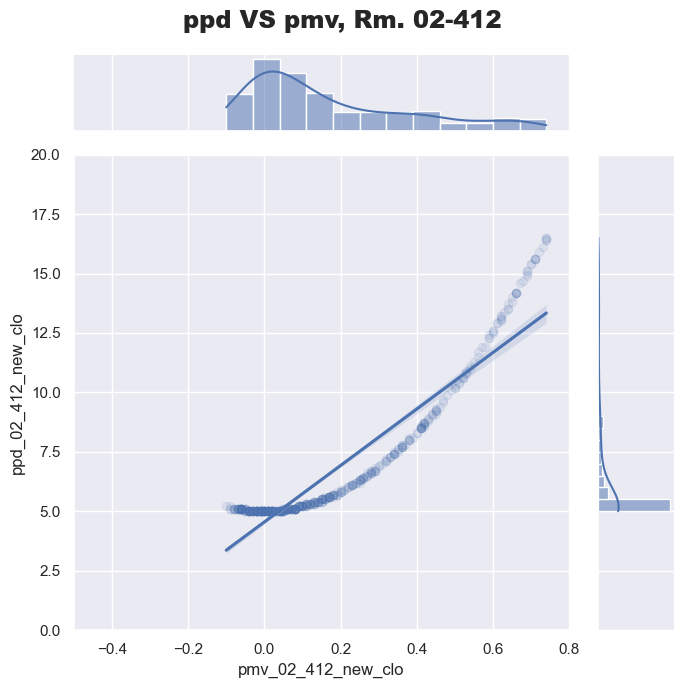

In [38]:
# check relationship between new pmv and ppd indexes
sns.set_style('darkgrid')
pnp = sns.jointplot(x='pmv_02_412_new_clo', y='ppd_02_412_new_clo', data=high_ppd_02_412_500th, kind='reg', 
              height=7, xlim=[-0.5,0.8], ylim=[0,20], palette='BrBG_r', scatter_kws={'alpha':0.09})
pnp.fig.suptitle('ppd VS pmv, Rm. 02-412', fontsize=17.5, fontweight ='heavy')
pnp.fig.tight_layout()

### Q8. Concerning 500 time slots of Room. 02-412 that originally gave 'Warm/Hot' sensations, would the sensations of occupants improve if they simply CHOSE TO TAKE OFF winter clothes, i.e changing the clo value into 0.61 clo (equivalant to 'Trousers and long sleeve shirt')? If yes, what would be the improved proportion of time slots?

From the newly computed pmv and ppd indexes, and above jointplot, it can be seen that,

- More than 87% time slots would no longer give 'Warm/Hot' sensations to occupants, if they simply chose to take off clothes under same environmental indoor conditions.


- With a high concentration of plots within pmv ~ -0.1 to 0.3 and ppd ~ 5.0 to 6.3 in relational plot above, pmv & ppd index values formed a strong non linear correlation.

## 7. Conclusions and further recommendations


- By concerning multiple indoor environmental factors, pmv and ppd indexes are more comprehensive evaluation approaches compared to pure examinations with temperature or humidity data (Sebastian Guenther, 2024)


- In some poorly air-conditioned indoor environments, thermal sensations of a big portion of occupants could be improved by changing their clothing level


- Despite being dependent on several parameters on its complex calculation processes and applications, thermal comfort indexes could be comparably highly influenced by temperature alone in indoor environments analyses, due to the assumptions of low air speed and simple heat transfer between ambient air & indoor surfaces (Unknown authur, 2010)

### Further recommendations

 - Apart from air-conditioning levels, floor heights of rooms, could be key factors of temperature volatilities in indoor environments (further analyses required)


- In regards to energy transitions, further analyses are to be conducted to predict the optimal options for air-conditioning systems in different indoor enviroments during different seasons, with a balanced hybrid use of traditional energy source


When the energy/natural resources consumptions are maintained to minimal, indoor environments factors have to be analysed and optimised in favour of occupants' experiences, combined with other methodologies such as, tree planting, building material and manufactoring transformations, the carbon neutrality goals would be acchieved by the global cooperation.


## 8. References

Unknown authur, 2024, Time and Date, accessed on 20 Jun 2024,
<<https://www.timeanddate.com/weather/australia/sydney>>

Jason Fernando, 2024, Investopedia, accessed on 22 Jun 2024,
<<https://www.investopedia.com/terms/r/r-squared.asp>>

Sebastian Guenther, 2024, SimScale, accessed on 2 Jul 2024,
<<https://www.simscale.com/blog/2019/09/what-is-pmv-ppd/>>

Federico Tartarini, 2024, pythermalcomfort, accessed on 4 Jul 2024, 
<<https://pythermalcomfort.readthedocs.io/en/latest/reference/pythermalcomfort.html#predicted-mean-vote-pmv-and-predicted-percentage-of-dissatisfied-ppd>>

Tartarini, F., Schiavon, S., 2020, Github, accessed on 7 Jul 2024,
<<https://github.com/CenterForTheBuiltEnvironment/pythermalcomfort>>

Tartarini, F., Schiavon, S., 2020, CBE University of California, accessed on 8 Jul 2024,
<<https://comfort.cbe.berkeley.edu/>>

Unknown authur, unknown year, Roast, accessed on 1 Aug 2024,
<<https://roastsurvey.com/blog-post/understanding-clo-values/>>

Unknown authur, 2010, sensible house, accessed on 2 Aug 2024, 
<<http://www.sensiblehouse.org/nrg_comfort.htm>>